In [1]:
cd ..

C:\Users\ADMIN\Desktop


In [2]:
cd ..

C:\Users\ADMIN


In [3]:
cd downloads

C:\Users\ADMIN\downloads


In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
from keras.layers import *
from keras.models import Model

def build_model():
  x = Input(shape=(64, 64, 3))
  out = x

  out = Flatten()(out)
  out = Dense(512, activation='relu')(out)
  out = Dense(256, activation='relu')(out)
  out = Dense(64, activation='relu')(out)
  out = Dense(1, activation='sigmoid')(out)

  model = Model(x, out)
  return model

In [6]:
model = build_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 12288)             0         
                                                                 
 dense (Dense)               (None, 512)               6291968   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,439,809
Trainable params: 6,439,809
Non-train

In [7]:
from keras.preprocessing.image import ImageDataGenerator

In [8]:
Generator = ImageDataGenerator()

train_gen = Generator.flow_from_directory('catdog/train/train', target_size=(64,64),
                                          batch_size=32,
                                          class_mode='binary')

Found 25000 images belonging to 2 classes.


In [9]:
train_gen

In [10]:
next(train_gen)

(array([[[[ 65.,  75.,  87.],
          [ 67.,  77.,  89.],
          [ 74.,  84.,  96.],
          ...,
          [122., 122., 110.],
          [117., 100.,  84.],
          [ 95.,  98., 113.]],
 
         [[ 70.,  80.,  92.],
          [ 70.,  80.,  92.],
          [ 76.,  86.,  98.],
          ...,
          [131., 117.,  80.],
          [122., 110.,  98.],
          [113., 121., 134.]],
 
         [[ 75.,  85.,  97.],
          [ 73.,  83.,  95.],
          [ 68.,  78.,  90.],
          ...,
          [131., 115.,  92.],
          [ 92.,  96.,  97.],
          [101., 113., 125.]],
 
         ...,
 
         [[ 20.,  38.,  40.],
          [ 31.,  49.,  51.],
          [ 20.,  41.,  42.],
          ...,
          [ 14.,   8.,  12.],
          [ 15.,   9.,  13.],
          [ 15.,   9.,  13.]],
 
         [[ 23.,  41.,  43.],
          [ 23.,  41.,  43.],
          [ 20.,  41.,  42.],
          ...,
          [ 23.,  17.,  21.],
          [ 21.,  15.,  19.],
          [ 15.,   9.,  13.

In [11]:
x_batch, y_batch = next(train_gen)
print(x_batch.shape)
print(y_batch.shape)

(32, 64, 64, 3)
(32,)


Text(0.5, 1.0, '1.0')

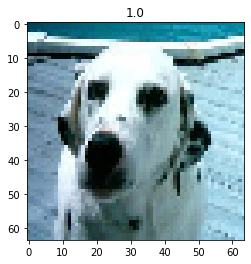

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_batch[0].astype('int32'))
plt.title(y_batch[0])

In [13]:
x_batch.max()

255.0

In [14]:
Generator = ImageDataGenerator(rescale=1/255.)

train_gen = Generator.flow_from_directory('catdog/train/train', target_size=(64,64),
                                          batch_size=32,
                                          class_mode='binary')

Found 25000 images belonging to 2 classes.


In [15]:
x_batch, y_batch = next(train_gen)
print(x_batch.shape)
print(y_batch.shape)

(32, 64, 64, 3)
(32,)


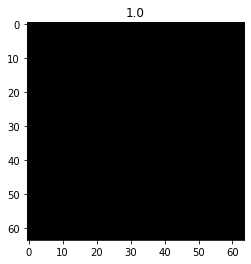

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(len(x_batch)):
  plt.imshow(x_batch[i].astype('int32'))
  plt.title(y_batch[i])

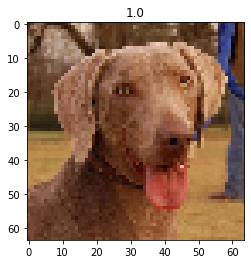

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(len(x_batch)):
  plt.imshow(x_batch[i])
  plt.title(y_batch[i])

In [18]:
x_batch.max()

1.0

In [20]:
new2_model = tf.keras.models.load_model('iris_2-140.h5')

In [21]:
new2_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])
history = new2_model.fit(train_gen, epochs=2, steps_per_epoch=len(train_gen))

Epoch 1/2
782/782 [==============================] - 71s 90ms/step - loss: 0.0018 - binary_accuracy: 0.9999
Epoch 2/2
782/782 [==============================] - 49s 62ms/step - loss: 0.0012 - binary_accuracy: 1.0000


In [22]:
new2_model.save('iris_2-142.h5')

test_gen = Generator.flow_from_directory ('catdog/test3/test3', target_size=(64, 64),
                                         batch_size=32, class_mode="categorical")

In [60]:
test_gen = Generator.flow_from_directory ('catdog', target_size=(64, 64),
                                         batch_size=32, classes=['test3'])

Found 4 images belonging to 1 classes.


In [67]:
test_gen = Generator.flow_from_directory ('catdog/test3', target_size=(64,64),
                                          batch_size=32,
                                          class_mode='binary')

Found 4 images belonging to 2 classes.


In [68]:
pred = new2_model.predict(test_gen)
pred.shape

(4, 1)

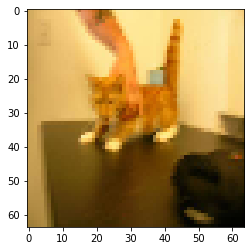

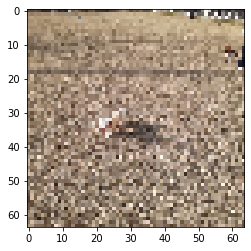

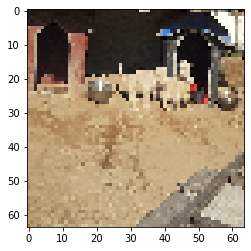

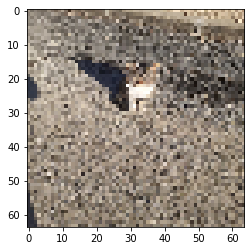

In [69]:
x_test, y_test = next(test_gen)
test_gen

for i in range(len(x_test)):
   plt.imshow(x_test[i])
   plt.show()

In [70]:
import numpy as np

x_tests, y_tests = [], []
for i in range(len(test_gen)):
  x_test, y_test = next(test_gen)
  x_tests.append(x_test)
  y_tests.append(y_test)

x_test = np.concatenate(x_tests, axis=0)
y_test = np.concatenate(y_tests, axis=0)

print(x_test.shape)
print(y_test.shape)

(4, 64, 64, 3)
(4,)


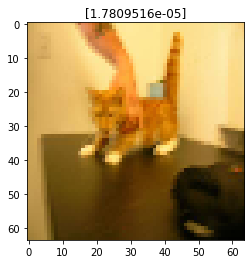

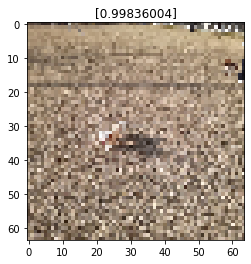

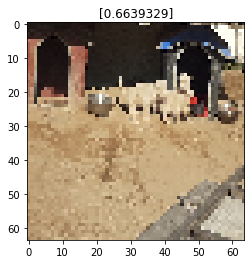

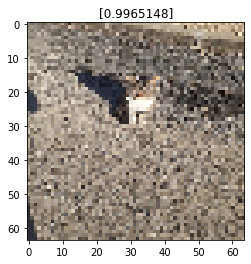

In [71]:
pred = new2_model.predict(x_test[:4])

for i in range(4):
   plt.imshow(x_test[i])
   plt.title(pred[i])
   plt.show()

In [72]:
train_gen.class_indices

{'cats': 0, 'dogs': 1}